# Display Value Function

Create a Rectbin with all States and their Value

### Input Variables:

$\mathbf{V}$ Matrix with Value Function    
$\mathbb{D}$ Demand Shocks  

$C$ Array with Colours used in Rectbin Graph

### Output Variables:

$\text{Rect}$ Rectbin graph with Value of each State

## Function:

In [1]:
function Value(V::Array{Float64,2},D::Array{Float64,1};colour=["white","gray","black"])
    
    """Create a Rectbin with all 
    States and their Value

    Parameters
    ----------
    V : Matrix with Value Function
    D : Demand Shocks
    colour: Array with Colours used in Rectbin Graph
    
    Output
    ----------
    Rect: Rectbin graph with Value of each State

    """
    
    Ds=size(V,1)    
    L=size(V,2)
    
    x=repeat([1:L],inner=[Ds]);
    y=repeat(D,outer=[L]);
    
    Rect=plot(x=x, y=y, color=collect(V),
    Scale.ContinuousColorScale(Scale.lab_gradient(color(colour[1]),color(colour[2]),color(colour[3]))),
    Guide.ylabel("Demand"),
    Guide.xlabel("Labour"),
    Guide.title("Value Function"),
    Guide.colorkey("Value"),
    Guide.xticks(ticks=[0:25:L]),
    Guide.yticks(ticks=D),
    Geom.rectbin)
    
    return Rect
    
end

Value (generic function with 1 method)

## Example

### Parameters:

In [2]:
import LabourDP

β=0.9;

G=3;
N=3;

# Create Wages

α₁=0.8;
β₁=0.1;

W=LabourDP.Wages(G,β₁,α₁);

# Create Production

F_0=0.8;
F_G=1.0;
F̂=1.1;
Ĝ=2;

F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);

# Create Firing Costs

ϕ=0.2;
S=true;

FC=LabourDP.FiringCost(G,ϕ,S,W);

# Create Demand

M_D=10.;
m_D=5.;
ρ=0.8;
N_D=6;
d=2.;

DShock=LabourDP.Demand(M_D,m_D,ρ,N_D,d);

# Create Labour Portfolio

fP=LabourDP.fPort(G);

N_G=ceil(Int,M_D/F_G);

L=LabourDP.LabourPortfolio(G,N,N_G,fP);

# Find Feasible Indexes

Feasf=LabourDP.fFeas(G,N);

Feas=LabourDP.FeasibleChoices(Feasf,L);

# Find Possible QnR

QnRFeas=LabourDP.FeasibleQnR(fP,L);

# Create QnR Transition

δ=0.1;
γ=0.5;

QnR=LabourDP.QnRTransition(L,QnRFeas,δ,γ);

# Create Profits

P=LabourDP.Profits(L,DShock[1],W,F,FC,Feas);

# VFI

Solution=LabourDP.VFI(β,P,DShock[2],QnR,Feas[2]);

#### Rectbin Graph:

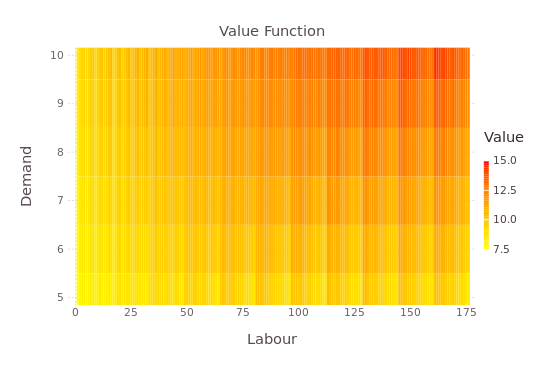

In [4]:
using Gadfly
using Color

Value(Solution[1],DShock[1],colour=["yellow","orange","red"])